In [3]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [15]:
# Load test data with predictions
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/06_Outputs/predict_output.csv")

In [19]:
# Extract true labels, predicted labels, and predicted probabilities
y_true = df['Actual']
y_pred = df['Churn_Prediction']

In [21]:
# If probabilities column exists (make sure your prediction saved probs as 'Predicted_Prob' or similar)
if 'Predicted_Prob' in df.columns:
    y_prob = df['Predicted_Prob']
elif 'Predicted_Probability' in df.columns:
    y_prob = df['Predicted_Probability']
elif 'Churn_Probability' in df.columns:
    y_prob = df['Churn_Probability']
else:
    y_prob = None

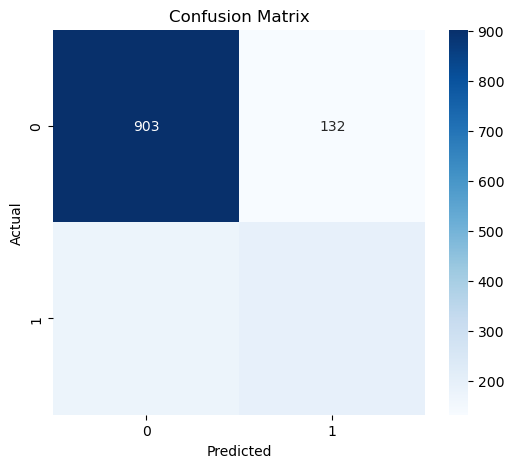

In [23]:
# 1. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



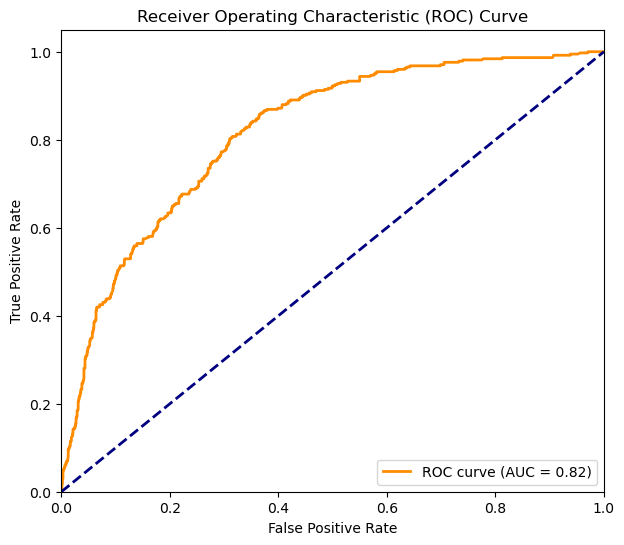

In [27]:
# 3. ROC Curve and AUC (if probabilities available)
if y_prob is not None:
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(7,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Predicted probabilities not found in dataframe; skipping ROC curve.")